In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import seaborn as sns

%matplotlib inline  

https://interfaithdental.com/smile-on-60/advocate/
Tennessee ranks 49th in senior dental care. 22% of older Tennesseans will lose all their natural teeth. 

SMILE ON 60+ is a statewide initiative with the goal of improving the overall health of low-income, mobile seniors age 60+ through access to oral healthcare services and community education.  SMILE ON 60+ will evaluate, educate, and navigate seniors into dental homes and then transport, treat, and repeat.

The funding for this project was provided through a grant awarded by the Davidson County Chancery Court, Part III from the SeniorTrust/ElderTrust settlement (Case No. 11-1548-III) and through a contract administered by the Tennessee Commission on Aging and Disability.

State Stats: https://nccd.cdc.gov/oralhealthdata/rdPage.aspx?rdReport=DOH_DATA.ExploreByLocation&rdProcessAction=&SaveFileGenerated=1&islLocation=47&rdICL-iclTopic=ADT&iclTopic_rdExpandedCollapsedHistory=&iclTopic=ADT&islYear=2018&hidLocation=47&hidTopic=ADT&hidYear=2018&irbShowFootnotes=Show&rdICL-iclIndicators=ADT1_1%2cADT1_3%2cADT1_4&iclIndicators_rdExpandedCollapsedHistory=&iclIndicators=ADT1_1%2cADT1_3%2cADT1_4&hidPreviouslySelectedIndicators=&DashboardColumnCount=2&rdShowElementHistory=&rdScrollX=0&rdScrollY=0&rdRnd=69609

In [2]:
#read in county geo data for map later:

counties = gpd.read_file('../data/county/tncounty.shp')

In [3]:
#read in poverty data for map later and split "County" from county name to merge with other data later:

TN_poverty = pd.read_excel('../data/PovertyEstimates.xls')

MapLocSplit = TN_poverty["Area_name"].str.rsplit(" ", n = 1, expand = True) 
TN_poverty["name"]= MapLocSplit[0] 
TN_poverty["county"]= MapLocSplit[1] 

TN_poverty.tail(10)

,FIPStxt,Stabr,Area_name,POVALL_2018,PCTPOVALL_2018,name,county
85,47171,TN,Unicoi County,2797,16.1,Unicoi,County
86,47173,TN,Union County,3858,19.8,Union,County
87,47175,TN,Van Buren County,918,16.3,Van Buren,County
88,47177,TN,Warren County,9025,22.5,Warren,County
89,47179,TN,Washington County,18528,14.9,Washington,County
90,47181,TN,Wayne County,3066,21.3,Wayne,County
91,47183,TN,Weakley County,6252,19.7,Weakley,County
92,47185,TN,White County,4612,17.3,White,County
93,47187,TN,Williamson County,8794,3.8,Williamson,County
94,47189,TN,Wilson County,10888,7.8,Wilson,County


In [4]:
#read in smile on data:

smileon_full = pd.read_csv('../data2/SmileOn11.28.2020.csv', skiprows=2, encoding='ISO-8859-1')

smileon_full.head()

C:\Users\kkosf\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,36,53,59,88,89,127,141,144,156,157,158,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,No,NaN,Yes


In [5]:
#beginning EDA for smile on data:

smileon_full.isnull().sum()

CallReportNum                                                                                                                                                                  0
ReportVersion                                                                                                                                                                  0
LinkedToCallReportNum                                                                                                                                                      40031
CallDateAndTimeStart                                                                                                                                                           0
CallDateAndTimeEnd                                                                                                                                                             0
                                                                                                                   

In [6]:
smileon_full.StateProvince.value_counts()

TN    40004
VA       16
KY        2
GA        2
MS        1
Name: StateProvince, dtype: int64

In [7]:
smileon_full['SMILE ON 60+ Site Information - Enroller Location'].value_counts()

Provider Site           23304
Health Assist Office     2573
Tooth Wisdom             1351
Outreach                  239
Senior Center             216
Name: SMILE ON 60+ Site Information - Enroller Location, dtype: int64

In [8]:
smileon_full['SMILE ON 60+ Case Management Information - Dental Clinic'].value_counts()

Interfaith Dental Clinic - Nashville                                                    487
Interfaith Dental Clinic - Murfreesboro                                                 180
Church Health Center - Memphis                                                           24
Karis Dental Clinic - Cleveland                                                          16
Friends in Need Health Center - Kingsport                                                11
Interfaith Health Clinic of Knoxville - Knoxville                                         9
Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties      1
Name: SMILE ON 60+ Case Management Information - Dental Clinic, dtype: int64

In [9]:
# create a new dataframe with fewer columns:

smileon = smileon_full[['CallReportNum', 'ReportVersion', 'CallDateAndTimeStart', 'CallerNum', 'CountyName', 'PostalCode', 
                        'SMILE ON 60+ Screening - Last Screening Date', 
                        'SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?', 
                        'SMILE ON 60+ Clinic Information - Was initial appointment made?',
                        'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?',
                        'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)',
                        'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                        'SMILE ON 60+ Screening - How often do you brush your teeth?', 
                        'SMILE ON 60+ Screening - Need for Periodontal Care',
                        'SMILE ON 60+ Screening - Root Fragments', 
                        'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions',
                        'SMILE ON 60+ Screening - Treatment Urgency', 
                        'SMILE ON 60+ Screening - Untreated Decay', 
                        'SMILE ON 60+ Site Information - Enroller ID',
                        'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 
                        'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
                        'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'
                       ]]

#and rename the columns to make things easier:

smileon = smileon.rename(columns = {'SMILE ON 60+ Screening - Last Screening Date': 'Last_Screen_Date', 
                                    'SMILE ON 60+ Clinic Information - Is patient of record date if yes last seen?' :'Date_Last_Seen', 
                                    'SMILE ON 60+ Clinic Information - Was initial appointment made?' :'Initial_Appt_Made',
                                    'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?': 'Last_Dentist_Visit',
                                    'SMILE ON 60+ Case Management Information - What barriers have kept you from finding a consistent dental home? (Select all that apply)' : 'Barriers',
                                    'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)' : 'Care_Provided',
                                    'SMILE ON 60+ Screening - How often do you brush your teeth?' : 'Brush_Frequency', 
                                    'SMILE ON 60+ Screening - Need for Periodontal Care' : 'Need_For_Care',
                                    'SMILE ON 60+ Screening - Root Fragments' : 'Root_Fragments', 
                                    'SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions' : 'Lesions',
                                    'SMILE ON 60+ Screening - Treatment Urgency' : 'Urgency', 
                                    'SMILE ON 60+ Screening - Untreated Decay' : 'Decay', 
                                    'SMILE ON 60+ Site Information - Enroller ID' : 'Clinic_Attended',
                                    'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?' : 'Tx_Plan_Complete', 
                                    'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?' : 'Tx_Plan_Developed',
                                    'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)' :
                                    'Function_Restored'
                                                
                                   })

smileon.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallerNum,CountyName,PostalCode,Last_Screen_Date,Date_Last_Seen,Initial_Appt_Made,Last_Dentist_Visit,...,Brush_Frequency,Need_For_Care,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored
0,81381827,SMILE ON 60+ Registration,11/25/2020 16:46,3859874,Robertson,37172.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,11/25/2020 15:40,3859755,Davidson,37212.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,11/25/2020 15:02,2518680,Hawkins,37857.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,81375215,SMILE ON 60+ Clinical,11/25/2020 14:17,3231923,Shelby,38104.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,11/25/2020 13:50,-1,NaN,NaN,11/25/2020,NaN,NaN,NaN,...,Once daily,NaN,Yes,NaN,Urgent Care - within next week-pain or infection,Yes,Neighborhood Health - Lebanon,NaN,Yes,No


In [10]:
smileon.isnull().sum()

CallReportNum               0
ReportVersion               0
CallDateAndTimeStart        0
CallerNum                   0
CountyName                347
PostalCode               2640
Last_Screen_Date        25140
Date_Last_Seen          36504
Initial_Appt_Made       35704
Last_Dentist_Visit       2808
Barriers                 5418
Care_Provided           15183
Brush_Frequency         35408
Need_For_Care           35545
Root_Fragments          35319
Lesions                 35609
Urgency                 35231
Decay                   35149
Clinic_Attended          7231
Tx_Plan_Complete        22497
Tx_Plan_Developed       23004
Function_Restored       25756
dtype: int64

In [11]:
smileon.CallerNum.nunique()

8708

In [12]:
smileon.Last_Dentist_Visit.value_counts()

Less than 12 months    16751
More than 5 years       8533
1 to 2 years            7077
3 to 5 years            4863
Name: Last_Dentist_Visit, dtype: int64

In [13]:
smileon.CallerNum.value_counts()

-1          70
 2441776    36
 2431132    31
 2416076    29
 2466994    28
            ..
 3825101     1
 3743280     1
 2653820     1
 3686036     1
 3821558     1
Name: CallerNum, Length: 8708, dtype: int64

In [14]:
#remove -1 & -2 from CallerNum as suggested:

smileon = smileon.loc[~smileon['CallerNum'].isin(['-1', '-2'])]
smileon.CallerNum.value_counts()

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
           ..
2536760     1
2510267     1
3200276     1
2450144     1
2496365     1
Name: CallerNum, Length: 8706, dtype: int64

In [15]:
# change CallDateAndTimeStart to datetime and separate date and time:

smileon['CallDateAndTimeStart'] = pd.to_datetime(smileon['CallDateAndTimeStart'])
smileon['date'] = smileon['CallDateAndTimeStart'].dt.date
smileon['time'] = smileon['CallDateAndTimeStart'].dt.time

smileon.head(3)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallerNum,CountyName,PostalCode,Last_Screen_Date,Date_Last_Seen,Initial_Appt_Made,Last_Dentist_Visit,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
0,81381827,SMILE ON 60+ Registration,2020-11-25 16:46:00,3859874,Robertson,37172.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN,2020-11-25,16:46:00
1,81379177,SMILE ON 60+ Registration,2020-11-25 15:40:00,3859755,Davidson,37212.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-25,15:40:00
2,81377435,SMILE ON 60+ Clinical,2020-11-25 15:02:00,2518680,Hawkins,37857.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Yes,Yes,Yes,2020-11-25,15:02:00


In [16]:
#Further EDA:

smileon.ReportVersion.value_counts()

#over twice as many clinical than registration (difference of 14,832)

SMILE ON 60+ Clinical        27357
SMILE ON 60+ Registration    12595
Name: ReportVersion, dtype: int64

In [17]:
smileon.Brush_Frequency.value_counts()

twice daily          2223
Once daily           1773
None                  289
three times daily     247
four times daily       32
Name: Brush_Frequency, dtype: int64

In [18]:
smileon.CountyName.value_counts()

Davidson           9292
Shelby             7398
Rutherford         3798
Sullivan           2209
Bradley            1789
                   ... 
Walker                1
Winchester City       1
McNairy               1
TN                    1
Desoto                1
Name: CountyName, Length: 104, dtype: int64

In [19]:
smileon.PostalCode.value_counts()

37130.0    1119
37013.0     966
37207.0     934
37211.0     787
37115.0     751
           ... 
37409.0       1
37406.0       1
37370.0       1
37320.0       1
30741.0       1
Name: PostalCode, Length: 479, dtype: int64

In [20]:
# Checking the number of clinics and how many times they were used:

print(smileon['Clinic_Attended'].nunique())

smileon['Clinic_Attended'].value_counts()

31


Interfaith Dental Clinic - Nashville                                                    5794
Interfaith Dental Clinic - Murfreesboro                                                 3646
Church Health Center - Memphis                                                          3581
Matthew Walker Comprehensive Health Center Inc. - Nashville                             2516
Interfaith Health Clinic of Knoxville - Knoxville                                       1822
Karis Dental Clinic - Cleveland                                                         1809
Friends in Need Health Center - Kingsport                                               1566
Healing Hands Health Center - Bristol                                                   1345
Keystone Dental Care Inc. - Johnson City                                                1031
Christ Community Health Services- Hickory Hill                                           986
Christ Community Health Services- Frayser                             

In [21]:
smileon.Decay.value_counts()

Yes           3276
No            1328
Edentulous     218
Name: Decay, dtype: int64

In [22]:
smileon.Root_Fragments.value_counts()

No     3333
Yes    1323
Name: Root_Fragments, dtype: int64

In [23]:
smileon.Lesions.value_counts()

No     4145
Yes     217
Name: Lesions, dtype: int64

In [24]:
smileon.Tx_Plan_Complete.value_counts()

No     12431
Yes     5103
Name: Tx_Plan_Complete, dtype: int64

In [25]:
smileon.Tx_Plan_Developed.value_counts()

Yes    15927
No      1095
Name: Tx_Plan_Developed, dtype: int64

In [26]:
smileon.Function_Restored.value_counts()

No     8123
Yes    6149
Name: Function_Restored, dtype: int64

In [27]:
smileon.date.value_counts()

2020-03-09    166
2019-10-01    147
2020-02-27    145
2019-10-08    145
2020-01-13    144
             ... 
2020-08-22      1
2019-05-18      1
2019-01-05      1
2018-06-08      1
2018-05-10      1
Name: date, Length: 640, dtype: int64

In [28]:
smileon.CallerNum.value_counts().head(20)

2441776    36
2431132    31
2416076    29
2860770    28
2466994    28
2412580    26
2508895    25
3483924    25
2605896    25
2384974    24
2585132    23
2519897    23
2758336    23
2390065    23
2398755    23
2413871    23
2425664    22
2384932    22
2509118    22
2402037    22
Name: CallerNum, dtype: int64

In [29]:
#Group CallerNums to look at those with many entries:

CallerNums = smileon.groupby('CallerNum')

In [30]:
CallerNums.get_group(2441776)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallerNum,CountyName,PostalCode,Last_Screen_Date,Date_Last_Seen,Initial_Appt_Made,Last_Dentist_Visit,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
685,80878764,SMILE ON 60+ Clinical,2020-11-05 14:46:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-11-05,14:46:00
1024,80784223,SMILE ON 60+ Clinical,2020-10-29 11:48:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-10-29,11:48:00
3353,79037448,SMILE ON 60+ Clinical,2020-09-14 11:42:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-09-14,11:42:00
3812,78220913,SMILE ON 60+ Clinical,2020-09-02 13:45:00,2441776,Davidson,37013.0,9/2/2020,Less than 12 months,NaN,Less than 12 months,...,No,Yes,Early care-within next several weeks,Yes,Interfaith Dental Clinic - Nashville,NaN,Yes,NaN,2020-09-02,13:45:00
3833,78698465,SMILE ON 60+ Clinical,2020-09-02 11:21:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-09-02,11:21:00
5312,77631129,SMILE ON 60+ Clinical,2020-08-05 11:14:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-08-05,11:14:00
5906,76991587,SMILE ON 60+ Clinical,2020-07-23 09:33:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-07-23,09:33:00
6439,76991448,SMILE ON 60+ Clinical,2020-07-13 09:30:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-07-13,09:30:00
11473,71557178,SMILE ON 60+ Clinical,2020-02-27 08:30:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,Yes,Yes,Yes,2020-02-27,08:30:00
14542,70184765,SMILE ON 60+ Clinical,2020-01-16 14:39:00,2441776,Davidson,37013.0,9/25/2018,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2020-01-16,14:39:00


In [31]:
CallerNums.get_group(2416076)

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallerNum,CountyName,PostalCode,Last_Screen_Date,Date_Last_Seen,Initial_Appt_Made,Last_Dentist_Visit,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
1193,80792354,SMILE ON 60+ Clinical,2020-10-26 14:05:00,2416076,Davidson,37115.0,10/26/2020,NaN,NaN,3 to 5 years,...,No,No,Early care-within next several weeks,Yes,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-10-26,14:05:00
4030,78500974,SMILE ON 60+ Clinical,2020-08-31 14:38:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-08-31,14:38:00
5497,77329572,SMILE ON 60+ Clinical,2020-07-31 22:44:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Murfreesboro,No,Yes,No,2020-07-31,22:44:00
13125,70810955,SMILE ON 60+ Clinical,2020-02-05 09:54:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-02-05,09:54:00
14930,70080607,SMILE ON 60+ Clinical,2020-01-13 12:49:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2020-01-13,12:49:00
16025,69737230,SMILE ON 60+ Clinical,2019-12-19 11:37:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,Yes,2019-12-19,11:37:00
18407,68190928,SMILE ON 60+ Clinical,2019-11-13 10:17:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-11-13,10:17:00
22967,66380005,SMILE ON 60+ Clinical,2019-09-11 14:14:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-09-11,14:14:00
24167,65850976,SMILE ON 60+ Clinical,2019-08-26 10:12:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,2019-08-26,10:12:00
26184,65220398,SMILE ON 60+ Clinical,2019-07-24 14:32:00,2416076,Davidson,37115.0,NaN,NaN,NaN,3 to 5 years,...,NaN,NaN,NaN,NaN,Interfaith Dental Clinic - Nashville,No,Yes,No,2019-07-24,14:32:00


In [32]:
# remove duplicates from data to look at individuals:

no_dups = smileon.drop_duplicates(subset='CallerNum', keep="first")
no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 40021
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CallReportNum         8706 non-null   int64         
 1   ReportVersion         8706 non-null   object        
 2   CallDateAndTimeStart  8706 non-null   datetime64[ns]
 3   CallerNum             8706 non-null   int64         
 4   CountyName            8594 non-null   object        
 5   PostalCode            8024 non-null   float64       
 6   Last_Screen_Date      2545 non-null   object        
 7   Date_Last_Seen        594 non-null    object        
 8   Initial_Appt_Made     735 non-null    object        
 9   Last_Dentist_Visit    7990 non-null   object        
 10  Barriers              7191 non-null   object        
 11  Care_Provided         4677 non-null   object        
 12  Brush_Frequency       785 non-null    object        
 13  Need_For_Care    

In [33]:
# Create a dataset with just county name and total number of users. Also had to make lowercase to merge with other data later:

no_dups['CountyName_lower'] = no_dups['CountyName'].str.lower()
county_counts = no_dups.CountyName_lower.value_counts()

county_counts = county_counts.to_frame().reset_index()

county_counts = county_counts.rename(columns = {'index': 'CountyName', 'CountyName_lower': 'total'})
county_counts.sort_values(by='CountyName',inplace=True)
print(county_counts.shape)
county_counts.head()

(102, 2)


<ipython-input-33-d534b34a63a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_dups['CountyName_lower'] = no_dups['CountyName'].str.lower()


,CountyName,total
59,anderson,17
13,bedford,115
74,benton,11
87,bledsoe,5
16,blount,86


In [34]:
# Merge county geo data with poverty data in order to create poverty map by county:

pov_map = pd.merge(left = counties, right = TN_poverty, 
                    left_on = 'NAME', right_on = 'name')
print(pov_map.shape)
pov_map.head(3)

(95, 13)


,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,FIPStxt,Stabr,Area_name,POVALL_2018,PCTPOVALL_2018,name,county
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47023,TN,Chester County,2555,15.9,Chester,County
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",47181,TN,Wayne County,3066,21.3,Wayne,County
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",47167,TN,Tipton County,7240,12.0,Tipton,County


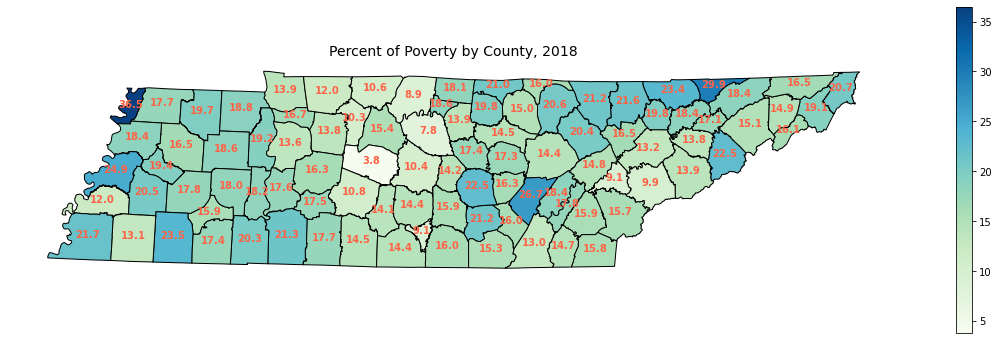

In [35]:
#Create map of poverty percent by county:

fig, ax = plt.subplots(figsize=(20,6))
pov_map.plot(column = 'PCTPOVALL_2018', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)

for index, row in pov_map.iterrows():
    plt.annotate(text=row['PCTPOVALL_2018'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', color = 'tomato')

plt.title('Percent of Poverty by County, 2018', fontsize = 14)
ax.axis('off');

In [36]:
#Merge smile on county totals with county geo data to create users by county:

counties['NAME_lower'] = counties['NAME'].str.lower()

smileon_map = pd.merge(left = counties, right = county_counts, 
                    left_on = 'NAME_lower', right_on = 'CountyName')
print(smileon_map.shape)
smileon_map.head(3)

(94, 9)


,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,NAME_lower,CountyName,total
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",chester,chester,6
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",wayne,wayne,18
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",tipton,tipton,40


In [37]:
pts_by_county = smileon_map[['NAME', 'geometry', 'total']]
pts_by_county = pts_by_county.rename(columns ={'NAME' : 'County', 'total' : 'patients'})
pts_by_county.sort_values('County', ignore_index=True, inplace=True)
print(pts_by_county.head())
pts_by_county.to_csv(r'C:\Users\kkosf\Documents\nss\projects\smile-on-spiderman\pts_by_county.csv', index=False)

     County                                           geometry  patients
0  Anderson  POLYGON ((2539671.281 623750.657, 2539541.603 ...        17
1   Bedford  POLYGON ((1811870.605 372240.939, 1811745.397 ...       115
2    Benton  POLYGON ((1393612.690 700920.921, 1393607.912 ...        11
3   Bledsoe  POLYGON ((2225730.465 410416.106, 2225395.337 ...         5
4    Blount  POLYGON ((2621826.470 572956.498, 2622039.552 ...        86


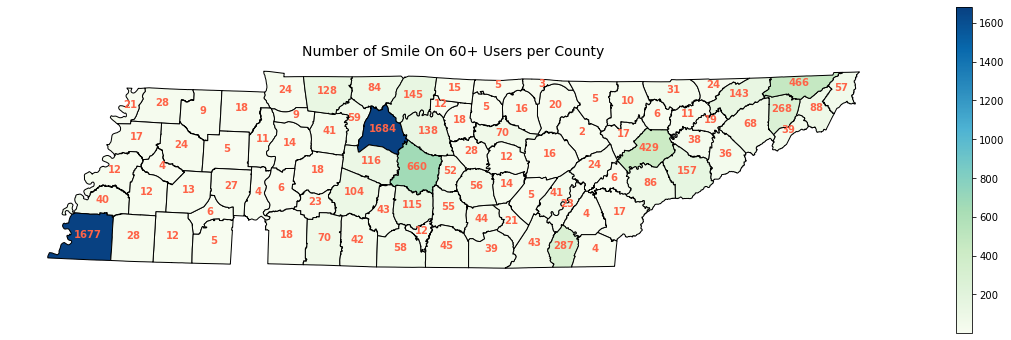

In [38]:
#Create map of smile on users by county:

fig, ax = plt.subplots(figsize=(20,6))
smileon_map.plot(column = 'total', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)

for index, row in smileon_map.iterrows():
    plt.annotate(text=row['total'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', color = 'tomato')
    
plt.title('Number of Smile On 60+ Users per County', fontsize = 14)
ax.axis('off');

# NOTE: no users from Hardin county

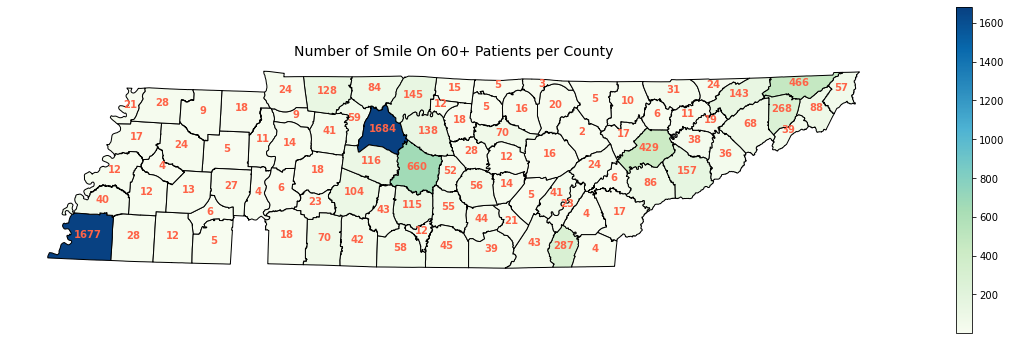

In [39]:
#Create map of smile on users by county:

fig, ax = plt.subplots(figsize=(20,6))
pts_by_county.plot(column = 'patients', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)

for index, row in pts_by_county.iterrows():
    plt.annotate(text=row['patients'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', color = 'tomato')
    
plt.title('Number of Smile On 60+ Patients per County', fontsize = 14)
ax.axis('off');

# NOTE: no users from Hardin county

In [40]:
# Create a dataframe with less info and remove day from date to get year-month only to make some plots over time:

use_over_time = no_dups[['ReportVersion', 'CallReportNum', 'date']].copy() 
use_over_time.date = use_over_time.date.apply(pd.to_datetime)
use_over_time.date = use_over_time.date.dt.strftime('%Y-%m')
print(use_over_time.shape)
use_over_time.sort_values(by='date',inplace=True)
use_over_time.head()

(8706, 3)


,ReportVersion,CallReportNum,date
40021,SMILE ON 60+ Clinical,53601932,2018-06
39443,SMILE ON 60+ Registration,55723216,2018-08
39445,SMILE ON 60+ Registration,55722968,2018-08
39446,SMILE ON 60+ Registration,55722854,2018-08
39450,SMILE ON 60+ Registration,55722077,2018-08


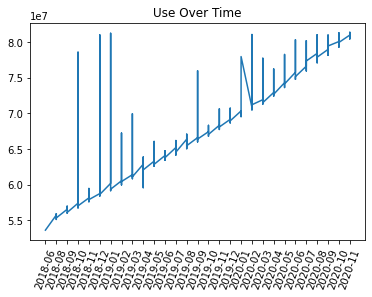

In [41]:
#plot of users over time, still needs work...

plt.plot('date', 'CallReportNum', data = use_over_time)
plt.xticks(rotation = 70)
plt.title('Use Over Time');

In [42]:
#separate out registration vs clinical:

reg_only = smileon[smileon['ReportVersion'] == 'SMILE ON 60+ Registration'] 
print(reg_only.shape)

clinic_only =  smileon[smileon['ReportVersion'] == 'SMILE ON 60+ Clinical'] 
print(clinic_only.shape)
clinic_only.head()

(12595, 24)
(27357, 24)


,CallReportNum,ReportVersion,CallDateAndTimeStart,CallerNum,CountyName,PostalCode,Last_Screen_Date,Date_Last_Seen,Initial_Appt_Made,Last_Dentist_Visit,...,Root_Fragments,Lesions,Urgency,Decay,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date,time
2,81377435,SMILE ON 60+ Clinical,2020-11-25 15:02:00,2518680,Hawkins,37857.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,Yes,Yes,Yes,2020-11-25,15:02:00
3,81375215,SMILE ON 60+ Clinical,2020-11-25 14:17:00,3231923,Shelby,38104.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Christ Community Health Services- Frayser,NaN,NaN,NaN,2020-11-25,14:17:00
5,81371535,SMILE ON 60+ Clinical,2020-11-25 13:04:00,3605119,Sullivan,37664.0,NaN,NaN,NaN,Less than 12 months,...,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,No,Yes,NaN,2020-11-25,13:04:00
6,81371527,SMILE ON 60+ Clinical,2020-11-25 13:03:00,3859184,Wilson,37087.0,NaN,NaN,NaN,1 to 2 years,...,NaN,NaN,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN,2020-11-25,13:03:00
7,81371481,SMILE ON 60+ Clinical,2020-11-25 13:02:00,3746643,Hawkins,37642.0,NaN,NaN,NaN,More than 5 years,...,NaN,NaN,NaN,NaN,Friends in Need Health Center - Kingsport,No,Yes,NaN,2020-11-25,13:02:00


In [43]:
clinic_only.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27357 entries, 2 to 40029
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CallReportNum         27357 non-null  int64         
 1   ReportVersion         27357 non-null  object        
 2   CallDateAndTimeStart  27357 non-null  datetime64[ns]
 3   CallerNum             27357 non-null  int64         
 4   CountyName            27177 non-null  object        
 5   PostalCode            25680 non-null  float64       
 6   Last_Screen_Date      14831 non-null  object        
 7   Date_Last_Seen        3524 non-null   object        
 8   Initial_Appt_Made     4324 non-null   object        
 9   Last_Dentist_Visit    25527 non-null  object        
 10  Barriers              23954 non-null  object        
 11  Care_Provided         24837 non-null  object        
 12  Brush_Frequency       4564 non-null   object        
 13  Need_For_Care   

In [44]:
#make smaller dataframe to use for a plot:

clinic_over_time = clinic_only[['ReportVersion', 'CallReportNum', 'date']].copy() 
clinic_over_time.date = clinic_over_time.date.apply(pd.to_datetime)
clinic_over_time.date = clinic_over_time.date.dt.strftime('%Y-%m')
print(clinic_over_time.shape)
clinic_over_time.sort_values(by='date',inplace=True)
clinic_over_time.head()

(27357, 3)


,ReportVersion,CallReportNum,date
40029,SMILE ON 60+ Clinical,67251405,2018-05
40026,SMILE ON 60+ Clinical,67251452,2018-05
40021,SMILE ON 60+ Clinical,53601932,2018-06
40011,SMILE ON 60+ Clinical,55627514,2018-08
39520,SMILE ON 60+ Clinical,55913515,2018-08


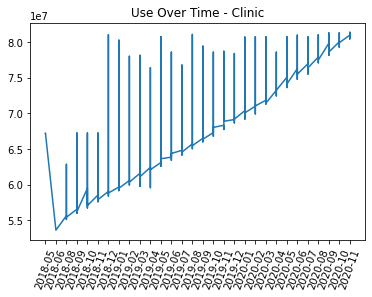

In [45]:
#create plot with only clinic data

plt.plot('date', 'CallReportNum', data = clinic_over_time)
plt.xticks(rotation = 70)
plt.title('Use Over Time - Clinic');

In [46]:
no_dups.Last_Dentist_Visit.value_counts(normalize=True)

#clinic_only
#Less than 12 months    0.481960
#More than 5 years      0.201395
#1 to 2 years           0.188389
#3 to 5 years           0.128256

Less than 12 months    0.423655
More than 5 years      0.257697
1 to 2 years           0.187234
3 to 5 years           0.131414
Name: Last_Dentist_Visit, dtype: float64

In [47]:
no_dups.Last_Dentist_Visit.value_counts()

Less than 12 months    3385
More than 5 years      2059
1 to 2 years           1496
3 to 5 years           1050
Name: Last_Dentist_Visit, dtype: int64

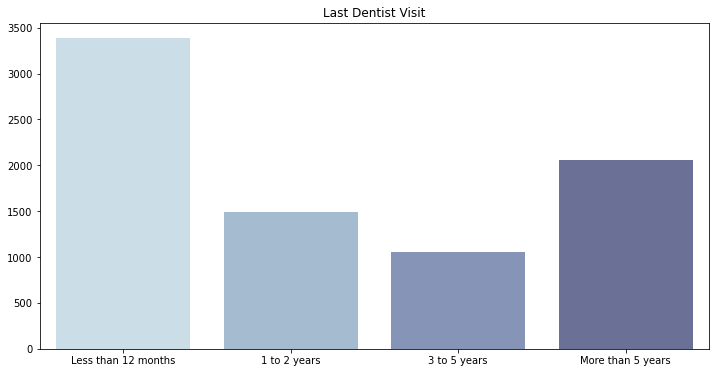

In [81]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize=(12,6))
sns.countplot(x="Last_Dentist_Visit", data = no_dups, 
              order=['Less than 12 months', '1 to 2 years', '3 to 5 years', 'More than 5 years'])
plt.xlabel("")
plt.ylabel("")
plt.title("Last Dentist Visit");

In [49]:
#create a dataframe for people who haven't been to the dentist in more than 5 years:

five_plus = smileon[smileon['Last_Dentist_Visit'] == 'More than 5 years'] 
print(five_plus.shape)
five_plus.ReportVersion.value_counts()

(8523, 24)


SMILE ON 60+ Clinical        5141
SMILE ON 60+ Registration    3382
Name: ReportVersion, dtype: int64

In [50]:
five_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 7 to 40021
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CallReportNum         8523 non-null   int64         
 1   ReportVersion         8523 non-null   object        
 2   CallDateAndTimeStart  8523 non-null   datetime64[ns]
 3   CallerNum             8523 non-null   int64         
 4   CountyName            8427 non-null   object        
 5   PostalCode            7944 non-null   float64       
 6   Last_Screen_Date      2962 non-null   object        
 7   Date_Last_Seen        545 non-null    object        
 8   Initial_Appt_Made     849 non-null    object        
 9   Last_Dentist_Visit    8523 non-null   object        
 10  Barriers              7929 non-null   object        
 11  Care_Provided         4645 non-null   object        
 12  Brush_Frequency       880 non-null    object        
 13  Need_For_Care    

In [51]:
five_plus.Brush_Frequency.value_counts()

Once daily           383
twice daily          344
None                 106
three times daily     43
four times daily       4
Name: Brush_Frequency, dtype: int64

In [52]:
five_plus_clinic = clinic_only[clinic_only['Last_Dentist_Visit'] == 'More than 5 years'] 
five_plus_clinic.shape

(5141, 24)

In [53]:
five_plus_clinic.CallerNum.value_counts().head(20)

2402037    21
2478100    20
2585132    19
2398060    18
2500180    18
2497241    18
2438750    17
2437467    17
2791646    17
2390783    17
2758336    17
2493460    16
2407035    15
2819668    15
2413848    15
2580524    15
2850538    15
2888859    15
2392636    15
2608941    15
Name: CallerNum, dtype: int64

In [54]:
five_plus_clinic.CallerNum.nunique()

1102

In [55]:
five_plus_clinic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5141 entries, 7 to 40021
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CallReportNum         5141 non-null   int64         
 1   ReportVersion         5141 non-null   object        
 2   CallDateAndTimeStart  5141 non-null   datetime64[ns]
 3   CallerNum             5141 non-null   int64         
 4   CountyName            5083 non-null   object        
 5   PostalCode            4771 non-null   float64       
 6   Last_Screen_Date      2962 non-null   object        
 7   Date_Last_Seen        545 non-null    object        
 8   Initial_Appt_Made     849 non-null    object        
 9   Last_Dentist_Visit    5141 non-null   object        
 10  Barriers              4817 non-null   object        
 11  Care_Provided         4645 non-null   object        
 12  Brush_Frequency       880 non-null    object        
 13  Need_For_Care    

In [56]:
five_plus_grouped_fx = five_plus_clinic.groupby(['CallerNum']).agg({'Function_Restored': "count"}).reset_index()
five_plus_grouped_fx

,CallerNum,Function_Restored
0,2307186,0
1,2385046,1
2,2386075,1
3,2387627,1
4,2389810,2
...,...,...
1097,3846758,0
1098,3853155,1
1099,3856693,1
1100,3856877,1


In [57]:
five_plus_grouped_fx.Function_Restored.value_counts()

#219 of 1102 of those that haven't been to the dentist in 5 years do not have function restored - 20%


1     308
0     219
2     148
3     116
4      99
5      76
6      58
7      45
8      13
9       8
10      7
12      3
16      1
11      1
Name: Function_Restored, dtype: int64

In [58]:
219/1102

0.1987295825771325

In [59]:
five_plus_grouped_txcomp = five_plus_clinic.groupby(['CallerNum']).agg({'Tx_Plan_Complete': "count"}).reset_index()
five_plus_grouped_txcomp

,CallerNum,Tx_Plan_Complete
0,2307186,0
1,2385046,0
2,2386075,1
3,2387627,1
4,2389810,1
...,...,...
1097,3846758,0
1098,3853155,1
1099,3856693,1
1100,3856877,1


In [60]:
five_plus_grouped_txcomp.Tx_Plan_Complete.value_counts()

#144 of 1102 of those that haven't been to the dentist in 5 years do not have their treatment plan complete - 13%


1     304
2     151
0     144
3     118
4     103
5      87
6      72
7      59
8      25
9      15
10     12
11     10
17      1
12      1
Name: Tx_Plan_Complete, dtype: int64

In [61]:
144/1102

0.1306715063520871

In [62]:
five_plus_clinic.Barriers.value_counts().head(10)

Dental cost; No insurance                                  2063
Dental cost                                                1173
No insurance                                                382
Transportation; Dental cost; No insurance                   235
Transportation; Dental cost                                 153
Dental cost; No insurance; Fear                             141
Dental cost; Physical mobility and health                   108
Dental cost; No insurance; Physical mobility and health      91
Dental cost; Fear                                            71
Transportation; Dental cost; Fear                            53
Name: Barriers, dtype: int64

In [63]:
#look at the top barriers to dental visits for all users:

top_barriers = no_dups.Barriers.value_counts().head(10).to_frame().reset_index()
top_barriers = top_barriers.rename(columns = {'index': 'Barriers', 'Barriers': 'count'})
top_barriers

,Barriers,count
0,Dental cost; No insurance,2928
1,Dental cost,2263
2,No insurance,637
3,Transportation; Dental cost; No insurance,244
4,Transportation; Dental cost,192
5,Dental cost; No insurance; Fear,162
6,Dental cost; Fear,134
7,Dental cost; No insurance; Physical mobility a...,82
8,Transportation,81
9,Fear,80


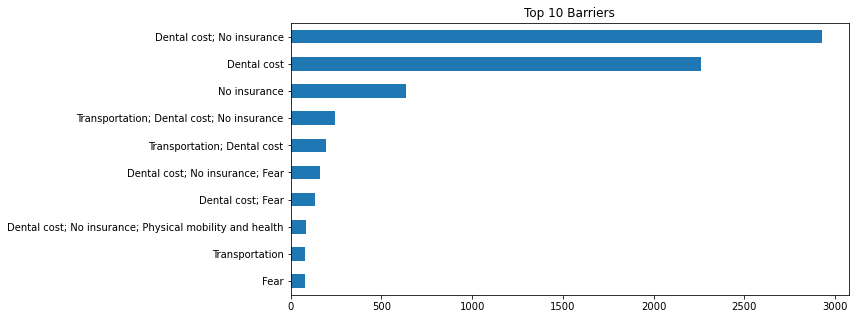

In [64]:
ax=top_barriers.sort_values(by='count').plot.barh(x='Barriers', figsize=(10, 5))
ax.get_legend().remove()
plt.ylabel("")
plt.title('Top 10 Barriers');

In [65]:
care_provided = clinic_only[['CallReportNum', 'CallerNum', 'CountyName', 'Care_Provided',
                        'Clinic_Attended', 'Tx_Plan_Complete', 'Tx_Plan_Developed', 'Function_Restored', 'date'
                       ]]

care_provided.head()

,CallReportNum,CallerNum,CountyName,Care_Provided,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date
2,81377435,2518680,Hawkins,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes,2020-11-25
3,81375215,3231923,Shelby,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN,2020-11-25
5,81371535,3605119,Sullivan,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN,2020-11-25
6,81371527,3859184,Wilson,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN,2020-11-25
7,81371481,3746643,Hawkins,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN,2020-11-25


In [66]:
care_provided.Function_Restored.value_counts(normalize=True)

No     0.569156
Yes    0.430844
Name: Function_Restored, dtype: float64

In [67]:
care_provided.Tx_Plan_Complete.value_counts(normalize=True)

No     0.708965
Yes    0.291035
Name: Tx_Plan_Complete, dtype: float64

In [68]:
care_provided.Tx_Plan_Developed.value_counts(normalize=True)

Yes    0.935671
No     0.064329
Name: Tx_Plan_Developed, dtype: float64

In [69]:
care_provided.CallerNum.value_counts().tail(10)

3755589    1
3558797    1
3640813    1
3778024    1
2887085    1
3464703    1
3165725    1
2758182    1
2520618    1
3041413    1
Name: CallerNum, dtype: int64

In [70]:
CareInfo = care_provided.groupby('CallerNum')
CareInfo.get_group(3558797)

,CallReportNum,CallerNum,CountyName,Care_Provided,Clinic_Attended,Tx_Plan_Complete,Tx_Plan_Developed,Function_Restored,date
6367,76396987,3558797,Davidson,150 - Comprehensive Oral Evaluation -new or es...,Matthew Walker Comprehensive Health Center Inc...,No,Yes,No,2020-07-13


In [71]:
# Working on subsetting people that only had one visit - look for those with tx plan not completed plus barriers?

one_visit = smileon.CallerNum.value_counts().loc[lambda x : x==1]
one_visit.head()

2797173    1
2996435    1
2743999    1
2888518    1
2422815    1
Name: CallerNum, dtype: int64